In [1]:
import numpy as np
from TO_sim.get_rrrp import get_K_r_rp
from tqdm.notebook import tqdm
from parfor import parfor
import matplotlib.pyplot as plt
from TO_sim.get_simul import get_r
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal

In [42]:
K_ = np.linspace(0,10,1001)
m_ = np.linspace(0,10,1001)
m =  7
R_u,R_0u,RP1_u,RPl_u = get_K_r_rp(m,K_)

In [7]:
K_ = np.linspace(0,10,1001)
m_ = np.linspace(0,10,1001)
R_us = []
R_0us = []
RP1_us = []
RPl_us = []

@parfor(m_)
def get_K_r_rp_m(m):
    R_u,R_0u,RP1_u,RPl_u = get_K_r_rp(m,K_)
    return R_u,R_0u,RP1_u,RPl_u


  0%|          | 0/1001 [00:00<?, ?it/s]

In [21]:
R_us,R_0us,RP_us,RPl_us = map(np.array,zip(*get_K_r_rp_m))

In [20]:
np.savez('Simul/RR_RP1000.npz',RP=RP_us,RPl=RPl_us,R=R_us,R0=R_0us,Ks=K_,ms=m_,allow_pickle=True)

In [2]:
DATA = np.load('Simul/RR_RP1000.npz',allow_pickle=True)
RP_us = DATA['RP']
RPl_us = DATA['RPl']
R_us = DATA['R']
R_0us = DATA['R0']
K_ = DATA['Ks']
m_ = DATA['ms']

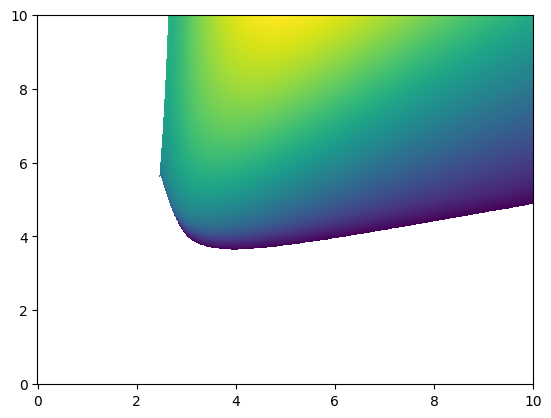

In [3]:
plt.pcolormesh(K_,m_,RPl_us)

In [6]:
N = 5000
seed = 1
theta,omega,_ = Q_Normal(N,0,1,seed=seed)
Y = np.r_[theta,theta]

In [12]:
r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(7,7,Y,omega,N)

In [58]:
ms = np.arange(0,10.01,0.1)
seeds_arr =np.arange(1,97,1)

In [59]:
N = 1000
seed_set = []
import multiprocessing
N_cpu = multiprocessing.cpu_count()
print(N_cpu)
for i in range(len(seeds_arr[::N_cpu])):
    try:
        seed_set.append(seeds_arr[N_cpu*i:N_cpu*i+N_cpu])
    except:
        seed_set.append(seeds_arr[N_cpu*i:])


16


In [60]:
K = 7
N_R0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Rs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ps = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ms = np.nan*np.ones((len(seeds_arr),len(ms)))
N_rstd = np.nan*np.ones((len(seeds_arr),len(ms)))

In [ ]:
for m_num,m in enumerate(tqdm(ms)):
    for seed_num,seeds in enumerate(seed_set):
        @parfor(seeds,(m,),bar=False)
        def get_r_seed(seed,m):
            theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            Y = np.r_[theta_random,theta_random]
            r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(K,m,Y,omega,N)
            return r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd 
        r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd  = zip(*get_r_seed)
        try:
            N_R0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = r0
            N_Rs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rs
            N_RPs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rp
            N_RMs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rm
            N_RPLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rpl
            N_RMLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rml
            N_0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = N0    
            N_Ps[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NP
            N_Ms[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NM
            N_rstd[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rstd
        except:
            N_R0s[N_cpu*seed_num:,m_num] = r0
            N_Rs[N_cpu*seed_num:,m_num] = rs
            N_RPs[N_cpu*seed_num:,m_num] = rp
            N_RMs[N_cpu*seed_num:,m_num] = rm
            N_RPLs[N_cpu*seed_num:,m_num] = rpl
            N_RMLs[N_cpu*seed_num:,m_num] = rml
            N_0s[N_cpu*seed_num:,m_num] = N0    
            N_Ps[N_cpu*seed_num:,m_num] = NP
            N_Ms[N_cpu*seed_num:,m_num] = NM
            N_rstd[N_cpu*seed_num:,m_num] = rstd
np.savez(f'RS_ensembles{len(seeds_arr)}_{N}_K{K}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd,seeds_arr=seeds_arr,ms=ms,N=N,K=K)

  0%|          | 0/101 [00:00<?, ?it/s]

In [ ]:
K = 7

ms = np.arange(4,5.01,0.01)
seeds_arr =np.arange(1,97,1)

N_R0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Rs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RPLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_RMLs = np.nan*np.ones((len(seeds_arr),len(ms)))
N_0s = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ps = np.nan*np.ones((len(seeds_arr),len(ms)))
N_Ms = np.nan*np.ones((len(seeds_arr),len(ms)))
N_rstd = np.nan*np.ones((len(seeds_arr),len(ms)))

In [ ]:
for m_num,m in enumerate(tqdm(ms)):
    for seed_num,seeds in enumerate(seed_set):
        @parfor(seeds,(m,),bar=False)
        def get_r_seed(seed,m):
            theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
            Y = np.r_[theta_random,theta_random]
            r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd = get_r(K,m,Y,omega,N)
            return r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd 
        r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd  = zip(*get_r_seed)
        try:
            N_R0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = r0
            N_Rs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rs
            N_RPs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rp
            N_RMs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rm
            N_RPLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rpl
            N_RMLs[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rml
            N_0s[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = N0    
            N_Ps[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NP
            N_Ms[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = NM
            N_rstd[N_cpu*seed_num:N_cpu*(seed_num+1),m_num] = rstd
        except:
            N_R0s[N_cpu*seed_num:,m_num] = r0
            N_Rs[N_cpu*seed_num:,m_num] = rs
            N_RPs[N_cpu*seed_num:,m_num] = rp
            N_RMs[N_cpu*seed_num:,m_num] = rm
            N_RPLs[N_cpu*seed_num:,m_num] = rpl
            N_RMLs[N_cpu*seed_num:,m_num] = rml
            N_0s[N_cpu*seed_num:,m_num] = N0    
            N_Ps[N_cpu*seed_num:,m_num] = NP
            N_Ms[N_cpu*seed_num:,m_num] = NM
            N_rstd[N_cpu*seed_num:,m_num] = rstd
np.savez(f'RS_ensembles_closer{len(seeds_arr)}_{N}_K{K}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd,seeds_arr=seeds_arr,ms=ms,N=N,K=K)

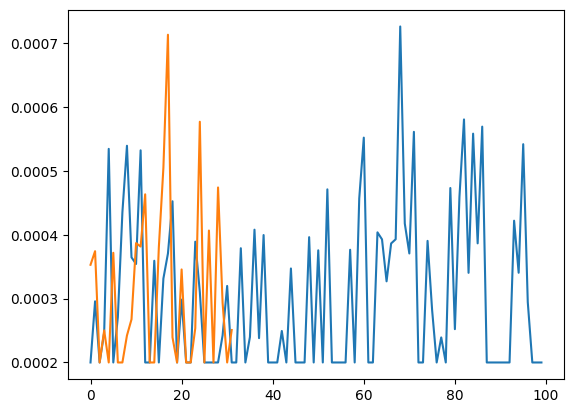

In [40]:
plt.plot(N_RPLs)

In [ ]:
np.savez(f'RS_{seed}.npz',N_R0s=N_R0s,N_Rs=N_Rs,N_RPs=N_RPs,N_RMs=N_RMs,N_RPLs=N_RPLs,N_RMLs=N_RMLs,N_0s=N_0s,N_Ps=N_Ps,N_Ms=N_Ms,N_rstd=N_rstd)


In [13]:
r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd 

(0.7003845546631934,
 0.09451120900561594,
 0.09301792488062295,
 0.6504364363625509,
 0.09650541646195114,
 0.09525225252003597,
 3528,
 500,
 493,
 0.1270289018306124)

(0.0, 10.5)

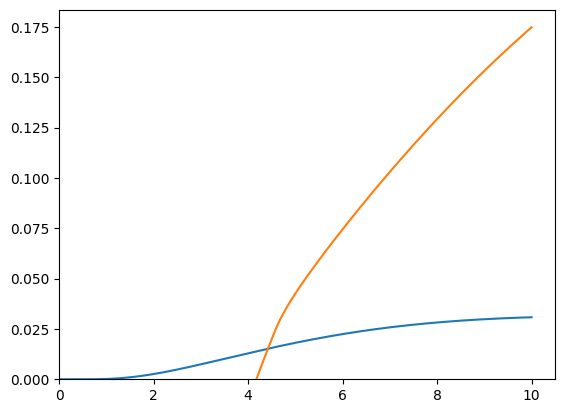

In [5]:
Rd = (R_0us - R_us)/2
plt.plot(m_,Rd[:,700])
plt.plot(m_,RP_us[:,700])
plt.ylim(0,)
plt.xlim(0,)

In [ ]:
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
